# Human Interaction Recognition



In [1]:

import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
raw_data = load_files(os.getcwd() + r'/Data', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']
train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=1/3, random_state=191)
valid_files = train_files[152:]
valid_targets = train_targets[152:]
train_files = train_files[:152]
train_targets = train_targets[:152]
print files,targets
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

['/home/karthik/HCI/codes/Data/Hugging/1.avi'
 '/home/karthik/HCI/codes/Data/Hugging/2.avi'
 '/home/karthik/HCI/codes/Data/Hugging/3.avi'
 '/home/karthik/HCI/codes/Data/Hugging/4.avi'
 '/home/karthik/HCI/codes/Data/Hugging/5.avi'
 '/home/karthik/HCI/codes/Data/Hugging/6.avi'
 '/home/karthik/HCI/codes/Data/Hugging/7.avi'
 '/home/karthik/HCI/codes/Data/Hugging/8.avi'
 '/home/karthik/HCI/codes/Data/Hugging/9.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A1.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A10.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A11.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A2.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A3.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A4.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A5.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A6.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A7.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A8.avi'
 '/home/karthik/HCI/codes/Data/Hugging/A9.avi'
 '/home/karthik/HCI/codes/Data/handshake/1.avi'
 '/home/karthik/HCI

In [2]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
list={}
i=0
for label in zip(range(7), raw_data['target_names']):
    print(label)
    #list.update
    list.update({i:raw_data['target_names'][i]})
    i=i+1
print list

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'Hugging')
(1, 'handshake')
(2, 'kicking')
(3, 'punching')
(4, 'pushing')
(5, 'walking')
(6, 'walking away')
{0: 'Hugging', 1: 'handshake', 2: 'kicking', 3: 'punching', 4: 'pushing', 5: 'walking', 6: 'walking away'}


In [3]:
for pair in zip(train_files[:7], train_targets[:7]):
    print(pair)

print "koppa"
print list[0]


('/home/karthik/HCI/codes/Data/punching/9.avi', 3)
('/home/karthik/HCI/codes/Data/walking/A18.avi', 5)
('/home/karthik/HCI/codes/Data/punching/2.avi', 3)
('/home/karthik/HCI/codes/Data/pushing/A14.avi', 4)
('/home/karthik/HCI/codes/Data/walking/A16.avi', 5)
('/home/karthik/HCI/codes/Data/walking/5.avi', 5)
('/home/karthik/HCI/codes/Data/walking/6.avi', 5)
koppa
Hugging


# Loading Sample 

/home/karthik/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

('\nShape of the sample data:', (1, 28, 480, 640, 3))


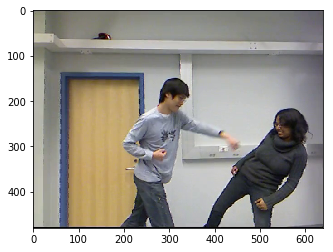

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from utils import Videos
%matplotlib inline
sample_files = train_files[:1]
reader = Videos(target_size=None, 
                to_gray=False)

sample = reader.read_videos(sample_files)
print('\nShape of the sample data:', sample.shape)

plt.imshow(sample[0][10])



---

## Pre-processing the Data



In [5]:

import numpy as np
from keras.utils import to_categorical
from utils import Videos


reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=10, 
                extract_frames='middle', 
                normalize_pixels=(0, 1))

In [7]:

X_train = reader.read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=7)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 152/152 [01:57<00:00,  1.30it/s]


('Shape of training data:', (152, 10, 128, 128, 1))
('Shape of training labels:', (152, 7))


In [6]:

X_valid = reader.read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=7)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 76/76 [00:53<00:00,  1.41it/s]

('Shape of validation data:', (76, 10, 128, 128, 1))
('Shape of validation labels:', (76, 7))


In [53]:
print y_train

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:

X_test = reader.read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=7)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

0it [00:00, ?it/s]


ValueError: need at least one array to concatenate

('\nShape of the preprocessed data:', (152, 10, 128, 128, 1))


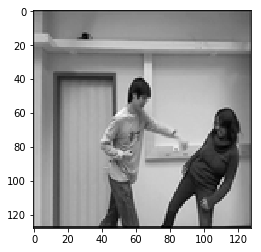

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(np.squeeze(X_train[0][0], axis=2), cmap='gray')
print('\nShape of the preprocessed data:', X_train.shape)

The shape of the training data is **(152, 10, 128, 128, 1)**

This indicates that - 

- There are **152 videos**.
- The video has **exactly 10 frames**.
- The dimension of **each frame is 128x128 pixels**.
- There is **only 1 channel** for each frame, i.e., all videos are gray scale

---

## Model Construction

### Model - 1


In [9]:
from keras.models import Sequential
import keras.layers.advanced_activations
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense
model = Sequential()


model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='tanh', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='tanh'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(GlobalAveragePooling3D())

model.add(Dense(32, activation='tanh'))

model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 2, 128, 128, 16)   1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 2, 64, 64, 16)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 64, 64, 64)     46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 1, 32, 32, 64)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 32, 32, 256)    737536    
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 1, 16, 16, 256)    0         
_________________________________________________________________
global_average_pooling3d_1 ( (None, 256)               0         
__________

### Training Model - 1


In [11]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_1.weights.best.hdf5', save_best_only=True, verbose=1)

#history = model.fit(X_train, y_train, batch_size=16, epochs=40,validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

### Evaluating Model - 1


In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
model.load_weights('Model_1.weights.best.hdf5')
(loss, accuracy) = model.evaluate(X_valid, y_valid, batch_size=16, verbose=0)
print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))
y_pred = model.predict_classes(X_valid)
for i in range(len(y_pred)):
    print ('The action is: for image',i,"is",list[y_pred[i]],"but is actually",list[valid_targets[i]])
print('f1 score on test data: {:.2f}%'.format(f1_score(valid_targets, y_pred, average="macro") * 100))
print('Precision on test data: {:.2f}%'.format(precision_score(valid_targets, y_pred, average="macro") * 100))
print('Recall on test data: {:.2f}%'.format(recall_score(valid_targets, y_pred, average="macro") * 100))   


Accuracy on test data: 63.16%
76/76 [==============================] - 0s 4ms/step
('The action is: for image', 0, 'is', 'kicking', 'but is actually', 'pushing')
('The action is: for image', 1, 'is', 'walking away', 'but is actually', 'walking')
('The action is: for image', 2, 'is', 'kicking', 'but is actually', 'kicking')
('The action is: for image', 3, 'is', 'punching', 'but is actually', 'punching')
('The action is: for image', 4, 'is', 'kicking', 'but is actually', 'kicking')
('The action is: for image', 5, 'is', 'punching', 'but is actually', 'punching')
('The action is: for image', 6, 'is', 'walking away', 'but is actually', 'walking away')
('The action is: for image', 7, 'is', 'kicking', 'but is actually', 'kicking')
('The action is: for image', 8, 'is', 'kicking', 'but is actually', 'kicking')
('The action is: for image', 9, 'is', 'walking away', 'but is actually', 'walking away')
('The action is: for image', 10, 'is', 'walking away', 'but is actually', 'walking away')
('The ac

In [13]:
y_pred = model.predict_classes(X_train[0:1])
print list[y_pred[0]],list[train_targets[0]]
y_pred = model.predict_classes(X_train[1:2])
print list[y_pred[0]],list[train_targets[0]]

1/1 [==============================] - 0s 7ms/step
punching punching
1/1 [==============================] - 0s 4ms/step
walking punching


In [14]:
data=load_files(os.getcwd() + r'/Sample', shuffle=False)
newfiles = data['filenames']
newtargets=[1]
newtargets=np.array(newtargets)
print newfiles,newtargets
newtest = reader.read_videos(newfiles)
#newlabel = to_categorical(newfiles, num_classes=7)
print('Shape of training data:', newtest.shape)
print('Shape of training labels:', y_train.shape)

  0%|          | 0/1 [00:00<?, ?it/s]

['/home/karthik/HCI/codes/Sample/handshake/VID_20180308_130014196.mp4'] [1]


100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

('Shape of training data:', (1, 10, 128, 128, 1))
('Shape of training labels:', (152, 7))


('Shape of training labels:', (1, 7))
('\nShape of the preprocessed data:', (1, 10, 128, 128, 1))


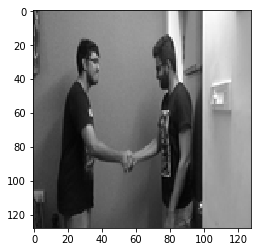

In [49]:
newlabel= to_categorical(newtargets, num_classes=7)
print('Shape of training labels:', newlabel.shape)
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(np.squeeze(newtest[0][0], axis=2), cmap='gray')
print('\nShape of the preprocessed data:', newtest.shape)

In [47]:
y_newpred = model.predict_classes(newtest)


1/1 [==============================] - 0s 3ms/step
handshake


In [51]:
print ("The predicted value is",list[y_newpred[0]],"The actual is",list[newtargets[0]])

('The predicted value is', 'handshake', 'The actual is', 'handshake')


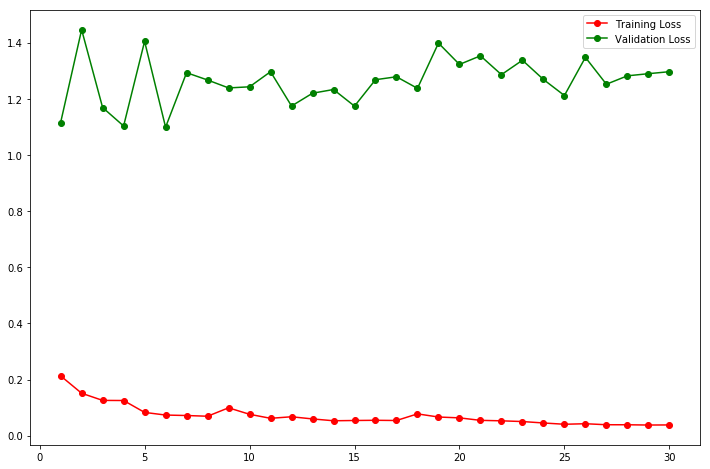

In [122]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          
val_loss = history.history['val_loss']                 
epochs = range(1, 31)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()


---

## Model - 2

In [34]:

from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout


model = Sequential()


model.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='tanh'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='tanh'))
model.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model.add(GlobalAveragePooling3D())

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_16 (Conv3D)           (None, 2, 128, 128, 16)   1456      
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 2, 64, 64, 16)     0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 1, 64, 64, 64)     46144     
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 1, 32, 32, 64)     0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 1, 32, 32, 256)    737536    
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 1, 16, 16, 256)    0         
_________________________________________________________________
global_average_pooling3d_6 ( (None, 256)               0         
__________

In [37]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, batch_size=16, epochs=40, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

Train on 152 samples, validate on 76 samples
Epoch 1/40
Epoch 00001: val_loss improved from inf to 1.48796, saving model to Model_2.weights.best.hdf5
 - 1s - loss: 1.4041 - acc: 0.3947 - val_loss: 1.4880 - val_acc: 0.4079
Epoch 2/40
Epoch 00002: val_loss improved from 1.48796 to 1.36018, saving model to Model_2.weights.best.hdf5
 - 1s - loss: 1.1873 - acc: 0.4803 - val_loss: 1.3602 - val_acc: 0.4211
Epoch 3/40
Epoch 00003: val_loss did not improve
 - 1s - loss: 1.1900 - acc: 0.4408 - val_loss: 1.4030 - val_acc: 0.4211
Epoch 4/40
Epoch 00004: val_loss did not improve
 - 1s - loss: 1.1861 - acc: 0.5132 - val_loss: 1.3772 - val_acc: 0.4211
Epoch 5/40
Epoch 00005: val_loss improved from 1.36018 to 1.32243, saving model to Model_2.weights.best.hdf5
 - 1s - loss: 1.1184 - acc: 0.5066 - val_loss: 1.3224 - val_acc: 0.4079
Epoch 6/40
Epoch 00006: val_loss did not improve
 - 1s - loss: 1.1197 - acc: 0.5197 - val_loss: 1.3435 - val_acc: 0.4211
Epoch 7/40
Epoch 00007: val_loss did not improve
 - 1

In [41]:
model.load_weights('Model_2.weights.best.hdf5')

(loss, accuracy) = model.evaluate(X_valid, y_valid, batch_size=16, verbose=0)
y_pred = model.predict_classes(X_valid)
print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))
print
print y_pred


76/76 [==============================] - 0s 4ms/step
Accuracy on test data: 44.74%

[4 5 3 3 2 3 5 4 2 5 5 4 5 5 5 5 5 5 5 5 0 5 0 4 4 4 2 5 4 4 4 4 4 2 4 4 5
 3 5 4 4 4 5 2 5 0 5 4 5 5 5 4 5 4 5 5 0 2 5 4 4 3 5 4 5 5 4 0 2 2 5 4 2 4
 4 5]


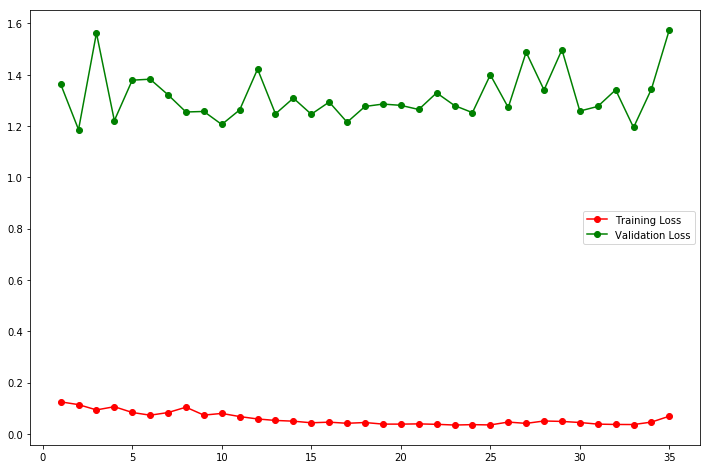

In [127]:
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          
val_loss = history.history['val_loss']                  
epochs = range(1, 36)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

## Extracting Particular Frames


In [ ]:
import numpy as np
from keras.utils import to_categorical
from utils import Videos

reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=40, 
                extract_frames='first', 
                required_fps=5, 
                normalize_pixels=(-1, 1))

In [ ]:
X_train = reader.read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

In [ ]:
X_valid = reader.read_videos(valid_files)
y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

In [ ]:
X_test = reader.read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

In [69]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

model = Sequential()

model.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model.add(GlobalAveragePooling3D())

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(6, activation='softmax'))

model.summary()

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'conv3d_57/convolution' (op: 'Conv3D') with input shapes: [?,1,15,15,256], [2,3,3,256,1024].

### Training Model - 3

In [ ]:
from keras.callbacks import ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='Model_3.weights.best.hdf5', save_best_only=True, verbose=1)

history = model.fit(X_train, y_train, batch_size=16, epochs=40, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint])

### Evaluating Model - 3


In [ ]:
model.load_weights('Model_3.weights.best.hdf5')

(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

In [ ]:
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          
val_loss = history.history['val_loss']                  
epochs = range(1, 41)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()

In [ ]:
import numpy as np
np.random.seed(141)


people = np.arange(1, 26)
chosen = np.random.choice(people, 9, replace=False)

print('The following people are chosen:', chosen)

bench_files = []
indexes = []
for index in chosen:
    for i, path in enumerate(raw_data['filenames']):
        if (('person' + str(index)) in path) or (('person0' + str(index)) in path):
            bench_files.append(path)
            indexes.append(i)
            
bench_files = np.array(bench_files)
bench_targets = raw_data['target'][indexes]

In [ ]:
import numpy as np
from keras.utils import to_categorical
from utils import Videos

reader = Videos(target_size=(128, 128), 
                to_gray=True, 
                max_frames=40, 
                extract_frames='first', 
                required_fps=5, 
                normalize_pixels=(-1, 1))

In [ ]:
bench_video = reader.read_videos(bench_files)
bench_target = to_categorical(bench_targets, num_classes=6)
print('Shape of training data:', bench_video.shape)
print('Shape of training labels:', bench_target.shape)

In [ ]:
model.load_weights('Model_3.weights.best.hdf5')

(loss, accuracy) = model.evaluate(bench_video, bench_target, batch_size=16, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

In [ ]:
benchmark_cnf_matrix = [
    [0.979, 0.07, 0.07, 0.0, 0.0, 0.07], 
    [0.354, 0.597, 0.035, 0.0, 0.0, 0.014], 
    [0.208, 0.049, 0.736, 0.0, 0.0, 0.07], 
    [0.0, 0.0, 0.0, 0.604, 0.167, 0.229], 
    [0.0, 0.0, 0.0, 0.389, 0.549, 0.063], 
    [0.0, 0.0, 0.0, 0.162, 0.0, 0.838]
]

benchmark_cnf_matrix = np.array(benchmark_cnf_matrix)

In [ ]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=False, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion Matrix of the Benchmark Model

In [ ]:
# Plotting the Confusion matrix of the Benchmark Model
confusion_matrix_plot(benchmark_cnf_matrix, 
                      classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'])

### Confusion matrix of Model-3

In [ ]:
# Imports
from sklearn.metrics import confusion_matrix

# Getting the predictions of our Model
predictions = model.predict_classes(bench_video)

# Constructing the Confusion Matrix
model_cnf_matrix = confusion_matrix(bench_targets, predictions)

# PLotting the confusion matrix of our model
confusion_matrix_plot = confusion_matrix_plot(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)

---


### The sequence of frames of a sample video of *Running*

In [ ]:
# Plotting the selected frames of a sample video (action being performed is running)

f, axarr = plt.subplots(5, 8, figsize=(17, 10))
row = 0
col = 0
for index, frame in enumerate(bench_video[17]):
    if index in [8, 16, 24, 32, 40]:
        row += 1
        col = 0
    axarr[row, col].imshow(np.squeeze(frame, axis=2), cmap='gray')
    col += 1

### The sequence of frames of a sample video of *Jogging*

In [ ]:
# Plotting the selected frames of a sample video (action being performed is jogging)

f, axarr = plt.subplots(5, 8, figsize=(17, 10))
row = 0
col = 0
for index, frame in enumerate(bench_video[13]):
    if index in [8, 16, 24, 32, 40]:
        row += 1
        col = 0
    axarr[row, col].imshow(np.squeeze(frame, axis=2), cmap='gray')
    col += 1

### The sequence of frames of a sample video of *Walking*

In [ ]:
# Plotting the selected frames of a sample video (action being performed is walking)

f, axarr = plt.subplots(5, 8, figsize=(17, 10))
row = 0
col = 0
for index, frame in enumerate(bench_video[21]):
    if index in [8, 16, 24, 32, 40]:
        row += 1
        col = 0
    axarr[row, col].imshow(np.squeeze(frame, axis=2), cmap='gray')
    col += 1